# Finding the LMC orbit ICs

In [90]:
%pylab inline
font = {'size':25, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


### Time of initial condition at which the N-body simulations starts. 

In [92]:
real_r = np.sqrt((-1.0)**2 + (-41.0)**2 + (-28.0)**2)
real_v  = np.sqrt((-57.0)**2 + (-226.0)**2 + (221.0)**2)

## Function to read data

In [93]:
def reading(filename):
    A1_host = loadtxt('../../../orbits/data/lmc/mw1lmc4/' + filename + '_host.txt')
    A1_sat = loadtxt('../../../orbits/data/lmc/mw1lmc4/' + filename + '_sat.txt')
    # Making Nbody and Analytic times equal
    t = A1_host[:,0] 
    # Defining galactocentric distances and velocities
    x = A1_sat[:,1] - A1_host[:,1] 
    y = A1_sat[:,2] - A1_host[:,2] 
    z = A1_sat[:,3] - A1_host[:,3] 

    vx = A1_sat[:,4] - A1_host[:,4] 
    vy = A1_sat[:,5] - A1_host[:,5] 
    vz = A1_sat[:,6] - A1_host[:,6] 
    R = np.sqrt(x**2 + y**2 + z**2)
    V = np.sqrt(vx**2 + vy**2 + vz**2)
    return t, x, y, z, vx, vy, vz, R, V

def reading_NB(filename):
    Nbody1 = loadtxt(filename)
    NB_t1 = Nbody1[:,0] 
    NB_R1 = Nbody1[:,1]
    NB_V1 = Nbody1[:,8]
    XNB = Nbody1[:,2] - Nbody1[:,5]
    YNB = Nbody1[:,3] - Nbody1[:,6]
    ZNB = Nbody1[:,4] - Nbody1[:,7]
    VXNB = Nbody1[:,9] - Nbody1[:,12]
    VYNB = Nbody1[:,10] - Nbody1[:,13]
    VZNB = Nbody1[:,11] - Nbody1[:,14]
    return NB_t1, XNB, YNB, ZNB, VXNB, VYNB, VZNB, NB_R1, NB_V1

First I integrate the  orbit using the Analytic code from the acutal position
of the LMC for 5 different dynamical friction models.

In [94]:
t07, x07, y07, z07, vx07, vy07, vz07, R07, V07 = reading('mw1lmc4-07')
t1, x1, y1, z1, vx1, vy1, vz1, R1, V1 = reading('mw1lmc4-1')
t12, x12, y12, z12, vx12, vy12, vz12, R12, V12 = reading('mw1lmc4-12')
t14, x14, y14, z14, vx14, vy14, vz14, R14, V14 = reading('mw1lmc4-14')
t16, x16, y16, z16, vx16, vy16, vz16, R16, V16 = reading('mw1lmc4-16')
#t17, x17, y17, z17, vx17, vy17, vz17, R17, V17 = reading('LMCMW_17H6')
#tNB14, xNB14, yNB14, zNB14, vxNB14, vyNB14, vzNB14, RNB14, VNB14  = reading_NB('LMCMW-H6.txt')

## Reading Cm of the MW and the LMC!

## Function that returns the ICs for the N-body simulations

In [57]:
def ICs(t, R, x, y, z, vx, vy, vz, xNB, yNB, zNB, vxNB, vyNB, vzNB):
    RIC = where(R14 >= 280)[0]
    IC1 = RIC[0]
    xIC = x14[IC1] + (x14[IC1] - xNB14[0])
    yIC = y14[IC1] + (y14[IC1] - yNB14[0])
    zIC = z14[IC1] + (z14[IC1] - zNB14[0])
    vxIC = vx14[IC1] + (vx14[IC1] - vxNB14[0])
    vyIC = vy14[IC1] + (vy14[IC1] - vyNB14[0])
    vzIC = vz14[IC1] + (vz14[IC1] - vzNB14[0])
    tIC = t14[IC1]
    return xIC, yIC, zIC, vxIC, vyIC, vzIC, tIC

In [84]:
print 'Initial values of the Nbody'
ICs()

Initial values of the Nbody
44.286201 258.087062 -99.348854 -23.995369 -196.016034 5.164706
[ 44.28      44.255465        nan ...,        nan        nan        nan]


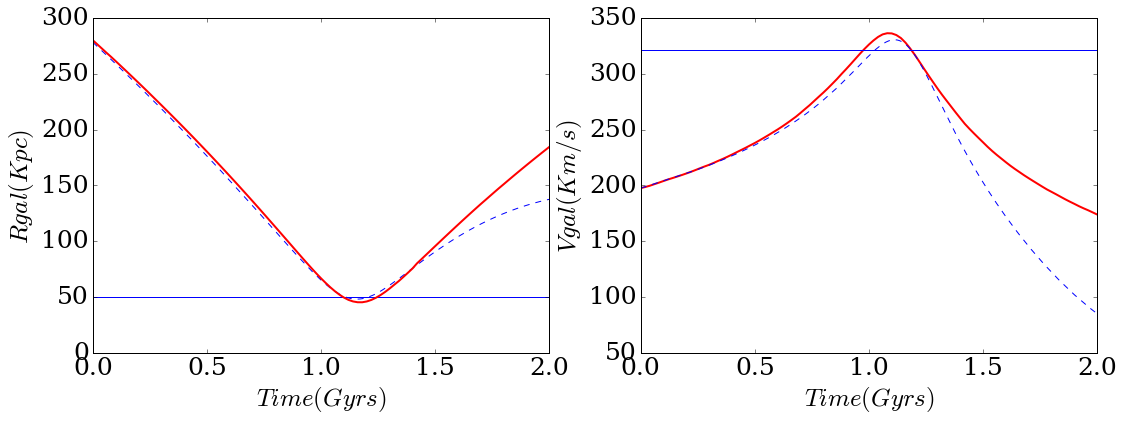

In [89]:
figure(figsize=(18, 6))
subplot(1, 2, 1)
#plot(t12, R12, ls='--')
#plot(t13, R13, ls='--')
#plot(t14, R14, ls='--')
plot(t15, R15, ls='--')
plot(t16, R16, ls='--')

plt.axhline(real_r)
#plot(t16, R16)
#plot(t17, R17)
plot(tNB14, RNB14, lw=2, c='r')
plt.xlabel('$Time(Gyrs)$')
plt.ylabel('$Rgal(Kpc)$')

subplot(1, 2, 2)
plot(tNB14, VNB14, lw=2, c='r')
#plot(t12, V12, ls='--')
#plot(t13, V13, ls='--')
#plot(t14, V14, ls='--')
plot(t15, V15, ls='--')
#plot(t16, V16, ls='--')
plt.axhline(real_v)
#plot(t16, V16)
#plot(t17, V17)
plt.xlabel('$Time(Gyrs)$')
plt.ylabel('$Vgal(Km/s)$')
savefig('finding_ICs.png', bbox_inches='tight')

In [78]:
#def xi2():

In [51]:
ICs(t14, R14, x14, y14, z14, vx14, vy14, vz14, xNB14, yNB14, zNB14, vxNB14, vyNB14, vzNB14)

(6.5526109999999989,
 280.73288200000007,
 -44.629248000000032,
 8.063741000000002,
 -175.16339999999997,
 -33.244045999999997,
 -1.264)